# Exploring how well served are rural areas?

hospital beds per capita?

size of county?

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# adjust pandas output

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
NYT = pd.read_csv('../Generated_Files/nyt_enriched.csv')
Hos_IRR = pd.read_csv('../Generated_Files/Hospital_and_IRR.csv')

In [21]:
NYT['fips'] = NYT['fips'].astype('int64')

In [22]:
NYT.head()

,State,County,Total Population,num_icu_be,bed_utiliz,potential,pco60,date,county,state,fips,cases,deaths,days_since_first_case,deaths_per_capita,cases_per_capita,deaths_per_case
0,Alabama,Autauga,55036,6.0,0.623113,30,0.031870,2020-04-27,Autauga,Alabama,1001,39,3,34,0.000055,0.000709,0.076923
1,Alabama,Baldwin,203360,44.0,1.657949,24,0.005158,2020-04-27,Baldwin,Alabama,1003,168,3,44,0.000015,0.000826,0.017857
2,Alabama,Barbour,26201,5.0,0.430640,44,0.046945,2020-04-27,Barbour,Alabama,1005,35,0,24,0.000000,0.001336,0.000000
3,Alabama,Blount,57667,6.0,0.499069,0,0.039312,2020-04-27,Blount,Alabama,1009,34,0,33,0.000000,0.000590,0.000000
4,Alabama,Butler,20126,7.0,0.183251,28,0.036570,2020-04-27,Butler,Alabama,1013,34,1,33,0.000050,0.001689,0.029412


In [33]:
Hos_IRR.head()

,FIPS2000,County Name,State,IRR2000,IRR2010,ID,NAME,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCEDATE,VAL_DATE,OWNER,BEDS,TRAUMA,HELIPAD
0,10001,Kent County,Delaware,0.42,0.41,219901,BAYHEALTH KENT GENERAL HOSPITAL,GENERAL ACUTE CARE,OPEN,KENT,10001,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/14 00:00:00,2014/02/10 00:00:00,NON-PROFIT,236,LEVEL 3,Y
1,10001,Kent County,Delaware,0.42,0.41,319901,DOVER BEHAVIORAL HEALTH SYSTEM,PSYCHIATRIC,OPEN,KENT,10001,USA,622210,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,2018/08/14 00:00:00,2019/04/16 00:00:00,PROPRIETARY,52,NOT AVAILABLE,N
2,10003,New Castle County,Delaware,0.28,0.26,419720,MEADOW WOOD BEHAVIORAL HEALTH SYSTEM,PSYCHIATRIC,OPEN,NEW CASTLE,10003,USA,622210,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,2018/08/14 00:00:00,2019/04/16 00:00:00,PROPRIETARY,53,NOT AVAILABLE,N
3,10003,New Castle County,Delaware,0.28,0.26,1319713,ROCKFORD CENTER,PSYCHIATRIC,OPEN,NEW CASTLE,10003,USA,622210,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,2018/08/14 00:00:00,2019/04/16 00:00:00,PROPRIETARY,92,NOT AVAILABLE,N
4,10003,New Castle County,Delaware,0.28,0.26,619803,ALFRED I. DUPONT HOSPITAL FOR CHILDREN,GENERAL ACUTE CARE,OPEN,NEW CASTLE,10003,USA,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2018/08/14 00:00:00,2014/02/10 00:00:00,NON-PROFIT,200,LEVEL 1 PEDIATRIC,Y


In [24]:
merged = NYT.merge(Hos_IRR, left_on='fips', right_on='FIPS2000',how='outer')

In [41]:
irr_hosp_tuples = []
for row in Hos_IRR.iterrows():
    irr_hosp_tuples.append((row[1]["County Name"].split(" County")[0], #remove 'County'
                       row[1]["State"].lstrip(), #remove leading whitespace
                       row[1]['IRR2010'],
                        row[1]['TYPE'],
                        row[1]['NAICS_DESC'],
                        row[1]['OWNER'],
                        row[1]['BEDS'],
                        row[1]['TRAUMA']))
irr_hosp_df=pd.DataFrame(irr_hosp_tuples,columns=['county','state','irr2010','hosp_type','hosp_desc','hosp_owner','hosp_beds','hosp_trauma'])

In [42]:
irr_hosp_df.head()

,county,state,irr2010,hosp_type,hosp_desc,hosp_owner,hosp_beds,hosp_trauma
0,Kent,Delaware,0.41,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,NON-PROFIT,236,LEVEL 3
1,Kent,Delaware,0.41,PSYCHIATRIC,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,PROPRIETARY,52,NOT AVAILABLE
2,New Castle,Delaware,0.26,PSYCHIATRIC,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,PROPRIETARY,53,NOT AVAILABLE
3,New Castle,Delaware,0.26,PSYCHIATRIC,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,PROPRIETARY,92,NOT AVAILABLE
4,New Castle,Delaware,0.26,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,NON-PROFIT,200,LEVEL 1 PEDIATRIC


In [44]:
nyte_irr_hosp_merged = pd.merge(irr_hosp_df, NYT, left_on=['county','state'], right_on=['County', 'State']).drop(['county_x','county_y','state_x','state_y'],axis=1)
nyte_irr_hosp_merged.head()

,irr2010,hosp_type,hosp_desc,hosp_owner,hosp_beds,hosp_trauma,State,County,Total Population,num_icu_be,bed_utiliz,potential,pco60,date,fips,cases,deaths,days_since_first_case,deaths_per_capita,cases_per_capita,deaths_per_case
0,0.41,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,NON-PROFIT,236,LEVEL 3,Delaware,Kent,173145,29.0,0.68772,0,0.007341,2020-04-27,10001,652,23,40,0.000133,0.003766,0.035276
1,0.41,PSYCHIATRIC,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,PROPRIETARY,52,NOT AVAILABLE,Delaware,Kent,173145,29.0,0.68772,0,0.007341,2020-04-27,10001,652,23,40,0.000133,0.003766,0.035276
2,0.26,PSYCHIATRIC,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,PROPRIETARY,53,NOT AVAILABLE,Delaware,New Castle,555036,93.0,1.03494,215,0.001697,2020-04-27,10003,1629,57,47,0.000103,0.002935,0.034991
3,0.26,PSYCHIATRIC,PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS,PROPRIETARY,92,NOT AVAILABLE,Delaware,New Castle,555036,93.0,1.03494,215,0.001697,2020-04-27,10003,1629,57,47,0.000103,0.002935,0.034991
4,0.26,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,NON-PROFIT,200,LEVEL 1 PEDIATRIC,Delaware,New Castle,555036,93.0,1.03494,215,0.001697,2020-04-27,10003,1629,57,47,0.000103,0.002935,0.034991


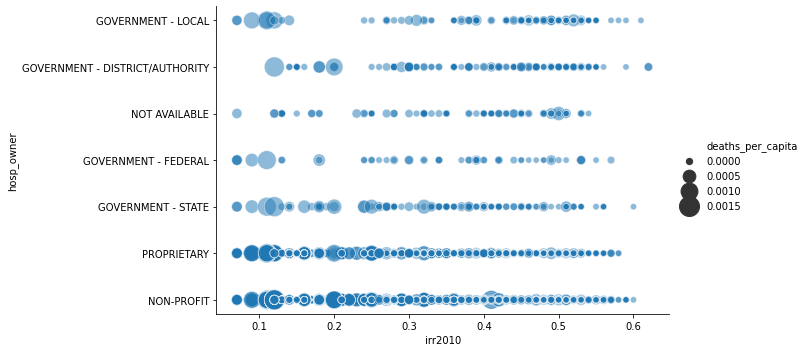

In [47]:
sns.relplot(x='irr2010', y='hosp_owner', size='deaths_per_capita', sizes=(40,400), alpha=.5, data=nyte_irr_hosp_merged, aspect=2)

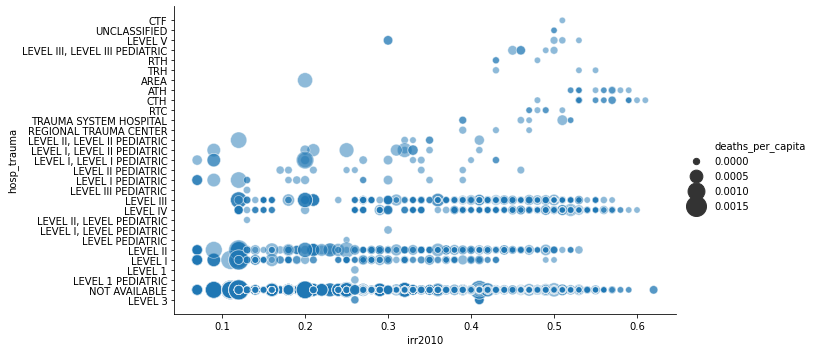

In [48]:
sns.relplot(x='irr2010', y='hosp_trauma', size='deaths_per_capita', sizes=(40,400), alpha=.5, data=nyte_irr_hosp_merged, aspect=2)

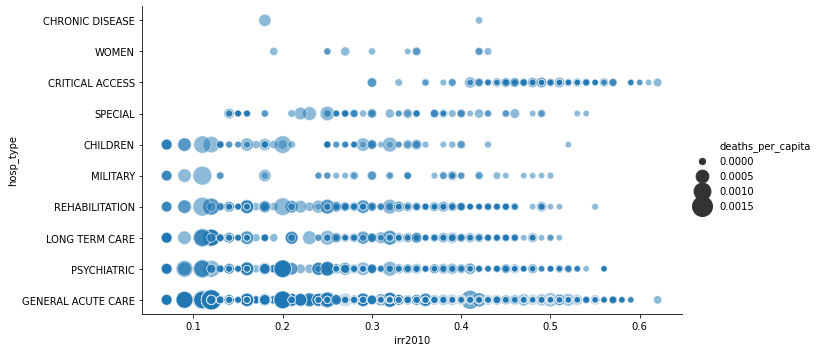

In [49]:
sns.relplot(x='irr2010', y='hosp_type', size='deaths_per_capita', sizes=(40,400), alpha=.5, data=nyte_irr_hosp_merged, aspect=2)